# Выбор скважены

<a name="1common."></a>
## <a name="0.0"></a>Содержание:
* [0. Подгрузка библиотек и самописные функции](#0.)
* [1. Загрузка и подготовка данных](#1.)
* [2. Обучение и проверка модели](#2.)
* [3. Подготовка к расчёту прибыли](#3.)
* [4. Расчёт прибыли и рисков](#4.)
* [Вывод](#5.)

# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## План работы:

**Загрузите и подготовьте данные. Поясните порядок действий.**

**Обучите и проверьте модель для каждого региона:**
* 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
* 2.2. Обучите модель и сделайте предсказания на валидационной выборке.
* 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
* 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
* 2.5. Проанализируйте результаты.

**Подготовьтесь к расчёту прибыли:**
* 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
* 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
* 3.3. Напишите выводы по этапу подготовки расчёта прибыли. 

**Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:**
* 4.1. Выберите скважины с максимальными значениями предсказаний. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины.
* 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
* 4.3. Рассчитайте прибыль для полученного объёма сырья.

**Посчитайте риски и прибыль для каждого региона:**
* 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
* 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.


## Условия задачи:
* 		Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* 		При разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли.
* 		Бюджет на разработку скважин в регионе — 10 млрд рублей.
* 		Один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* 		После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Описание данных

**Данные геологоразведки трёх регионов находятся в файлах**
* 		geo_data_0.csv
* 		geo_data_1.csv
* 		geo_data_2.csv

**Признаки**
* 		id — уникальный идентификатор скважины;
* 		f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

**Целевой признак**
* 		product — объём запасов в скважине (тыс. баррелей).

<a name="0."></a><br/>
<font size="6"><b>0. Подгрузка библиотек и самописные функции</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

import joblib
import warnings

from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

from termcolor import colored

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
#Определяем болд
def bold(): 
    return "\033[1m"

def bold_end(): 
    return "\033[0m"

#Ставим формат для нумериков
pd.options.display.float_format = '{: >10.2f}'.format

#Убираем ворнинги
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#**Функция print_basic_info, для вывода информации о массиве, и его переменных.**

#4 входных параметра

#* base - название базы данных
#* info - 1: вывод информации о массиве, другое: не вывод
#* head - n: вывод примера базы (вывод n - строк), n < 1: не вывод
#* describe - 1: вывод описания переменных массива, другое: не вывод        

def print_basic_info(base, info, head, describe):
    if info == 1:
        print("\n", bold(), colored('info','green'), bold_end(), "\n")
        print( base.info())  
    if head >= 1:
        print("\n", bold(),colored('head','green'),bold_end())
        display(base.head(head))
    if describe == 1:
        print("\n", bold(),colored('describe','green'),bold_end(),"\n")
        for i in base.columns:
            print("\n", bold(), colored(i,'blue'),bold_end(),"\n", base[i].describe())

<a name="1."></a><br/>
<font size="6"><b>1. Загрузка и подготовка данных</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Загрузим данные, Id точки - будет индексом

In [1]:
#Работаю локально, онлайн путь в хабе немного другой ('/datasets/...')

geo_data_0 = pd.read_csv('datasets/insurance.csv', sep=',',decimal='.',, index_col = 'id' )

NameError: name 'pd' is not defined

Последовательно посмотрим на датасеты

In [5]:
#Инфо
print_basic_info(geo_data_0,1,5,1)


  info  

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None

  head 


,f0,f1,f2,product
id,,,,
txEyH,0.71,-0.50,1.22,105.28
2acmU,1.33,-0.34,4.37,73.04
409Wp,1.02,0.15,1.42,85.27
iJLyR,-0.03,0.14,2.98,168.62
Xdl7t,1.99,0.16,4.75,154.04



  describe  


  f0  
 count    100000.00
mean          0.50
std           0.87
min          -1.41
25%          -0.07
50%           0.50
75%           1.07
max           2.36
Name: f0, dtype: float64

  f1  
 count    100000.00
mean          0.25
std           0.50
min          -0.85
25%          -0.20
50%           0.25
75%           0.70
max           1.34
Name: f1, dtype: float64

  f2  
 count    100000.00
mean          2.50
std           3.25
min         -12.09
25%           0.29
50%           2.52
75%           4.72
max          16.00
Name: f2, dtype: float64

  product  
 count    100000.00
mean         92.50
std          44.29
min           0.00
25%          56.50
50%          91.85
75%         128.56
max         185.36
Name: product, dtype: float64


In [6]:
#Инфо
print_basic_info(geo_data_1,1,5,1)


  info  

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None

  head 


,f0,f1,f2,product
id,,,,
kBEdx,-15.00,-8.28,-0.01,3.18
62mP7,14.27,-3.48,1.00,26.95
vyE1P,6.26,-5.95,5.00,134.77
KcrkZ,-13.08,-11.51,5.00,137.95
AHL4O,12.70,-8.15,5.00,134.77



  describe  


  f0  
 count    100000.00
mean          1.14
std           8.97
min         -31.61
25%          -6.30
50%           1.15
75%           8.62
max          29.42
Name: f0, dtype: float64

  f1  
 count    100000.00
mean         -4.80
std           5.12
min         -26.36
25%          -8.27
50%          -4.81
75%          -1.33
max          18.73
Name: f1, dtype: float64

  f2  
 count    100000.00
mean          2.49
std           1.70
min          -0.02
25%           1.00
50%           2.01
75%           4.00
max           5.02
Name: f2, dtype: float64

  product  
 count    100000.00
mean         68.83
std          45.94
min           0.00
25%          26.95
50%          57.09
75%         107.81
max         137.95
Name: product, dtype: float64


In [7]:
#Инфо
print_basic_info(geo_data_2,1,5,1)


  info  

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None

  head 


,f0,f1,f2,product
id,,,,
fwXo0,-1.15,0.96,-0.83,27.76
WJtFt,0.26,0.27,-2.53,56.07
ovLUW,0.19,0.29,-5.59,62.87
q6cA6,2.24,-0.55,0.93,114.57
WPMUX,-0.52,1.72,5.90,149.60



  describe  


  f0  
 count    100000.00
mean          0.00
std           1.73
min          -8.76
25%          -1.16
50%           0.01
75%           1.16
max           7.24
Name: f0, dtype: float64

  f1  
 count    100000.00
mean         -0.00
std           1.73
min          -7.08
25%          -1.17
50%          -0.01
75%           1.16
max           7.84
Name: f1, dtype: float64

  f2  
 count    100000.00
mean          2.50
std           3.47
min         -11.97
25%           0.13
50%           2.48
75%           4.86
max          16.74
Name: f2, dtype: float64

  product  
 count    100000.00
mean         95.00
std          44.75
min           0.00
25%          59.45
50%          94.93
75%         130.60
max         190.03
Name: product, dtype: float64


Датасеты состоят из 10 тыс кейсов. 
Заполнены полностью. 

Посмотрим корреляции признаков с целевым и между собой

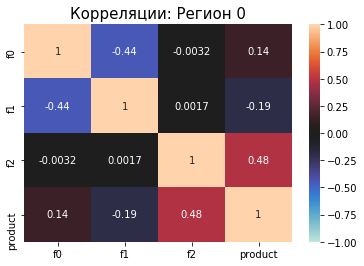

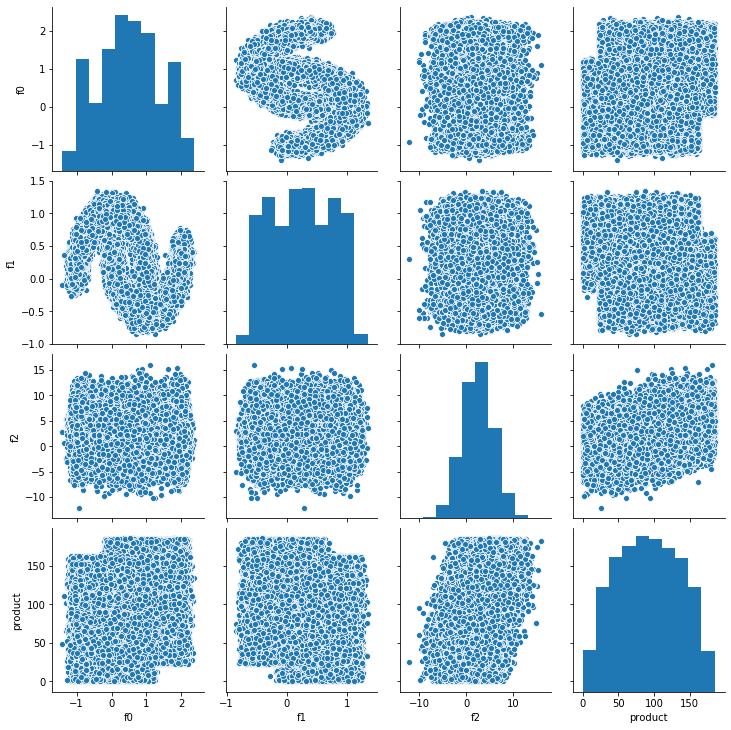

In [8]:
def corr_pairplot(base, name):
    # уровень 
    corr = base.corr()
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.index, center=0, annot=True, vmin=-1, vmax=1 )
    plt.title(name, fontsize=15)
    plt.show()
    #графическое отображение 
    sns.pairplot(base)
    plt.show()

corr_pairplot(base = geo_data_0, name = "Корреляции: Регион 0")

Есть отрицательная корреляция между признаками 0 и 1. А также 2 и целевым.

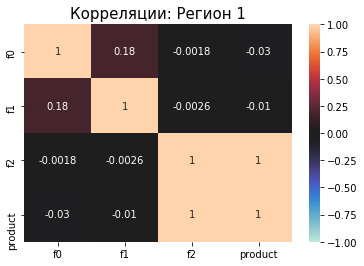

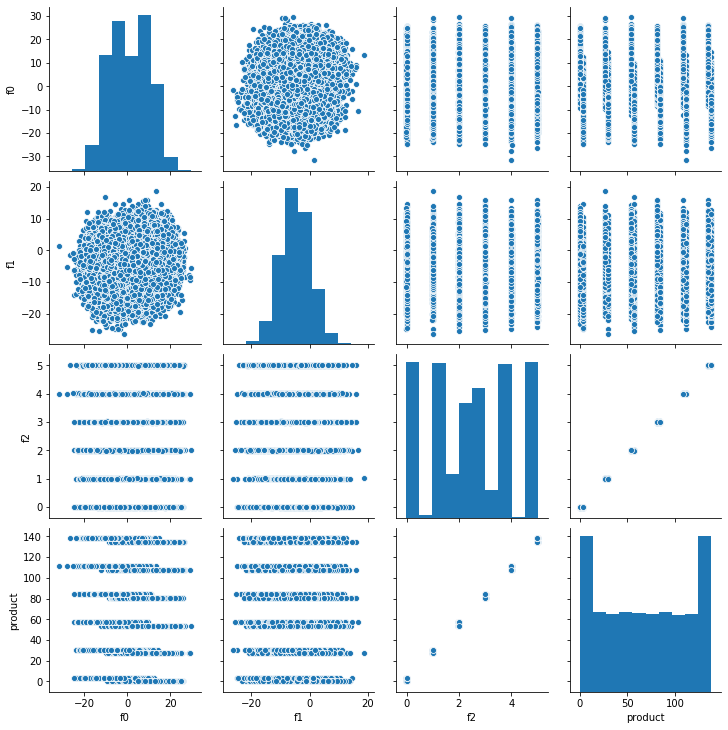

In [9]:
corr_pairplot(base = geo_data_1, name = "Корреляции: Регион 1")

<b>! Очень сильная корреляция между целевым признаком и F2, что вероятно позволит сделать предсказание достаточно точным. Вероятно точнее, чем в регионе 0 </b>

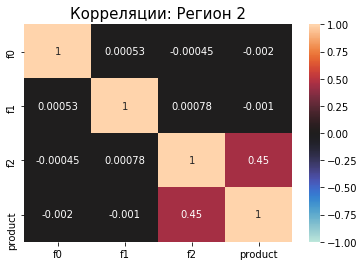

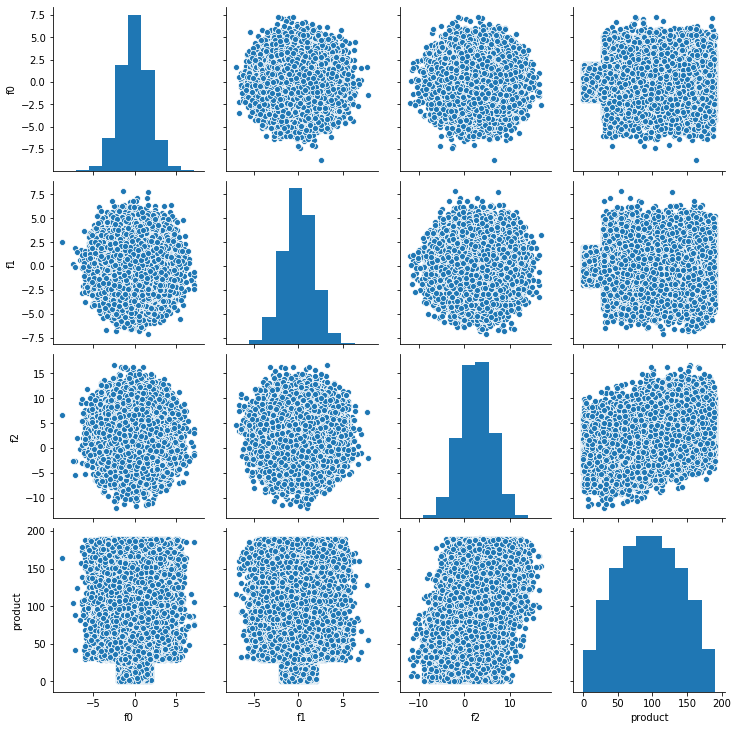

In [10]:
corr_pairplot(base = geo_data_2, name = "Корреляции: Регион 2")

Есть положительная корреляция между признаком 2 и целевым.

В работу берем все переменные (f0,f1,f2)
#### Разобьем данные на выборки

In [11]:
features_0, target_0 = geo_data_0.drop(['product'], axis=1), geo_data_0['product']
features_1, target_1 = geo_data_1.drop(['product'], axis=1), geo_data_1['product']
features_2, target_2 = geo_data_2.drop(['product'], axis=1), geo_data_2['product']

In [12]:
#разбиваем на train и valid. 
features_0_train, features_0_valid, target_0_train, target_0_valid = train_test_split(features_0, target_0, test_size=0.25, random_state=241)

features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(features_1, target_1, test_size=0.25, random_state=241)

features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(features_2, target_2, test_size=0.25, random_state=241)

#Проверяем размер
print(bold(), colored('Регион 0','blue'),bold_end())
print("features_0_train sample",features_0_train.shape)
print("target_0_train sample",target_0_train.shape)
print("features_0_valid sample",features_0_valid.shape)
print("target_0_valid sample",target_0_valid.shape)

print(bold(), colored('Регион 1','blue'),bold_end())
print("features_1_train sample",features_1_train.shape)
print("target_1_train sample",target_1_train.shape)
print("features_1_valid sample",features_1_valid.shape)
print("target_1_valid sample",target_1_valid.shape)

print(bold(), colored('Регион 2','blue'),bold_end())
print("features_2_train sample",features_2_train.shape)
print("target_2_train sample",target_2_train.shape)
print("features_2_valid sample",features_2_valid.shape)
print("target_2_valid sample",target_2_valid.shape)

 Регион 0 
features_0_train sample (75000, 3)
target_0_train sample (75000,)
features_0_valid sample (25000, 3)
target_0_valid sample (25000,)
 Регион 1 
features_1_train sample (75000, 3)
target_1_train sample (75000,)
features_1_valid sample (25000, 3)
target_1_valid sample (25000,)
 Регион 2 
features_2_train sample (75000, 3)
target_2_train sample (75000,)
features_2_valid sample (25000, 3)
target_2_valid sample (25000,)


### Вывод:


* Всего 3 региона(0,1,2). Каждый из 10 тыс. точек.
* Переменные заполнены полностью. 
* Дополнительная обработка переменных не требуется.
* Высокая корреляция переменной F2 с целевой в 1 регионе позволяет предположить, что обучение модели в этом регионе будет наиболее успешным. 
* Разбили семплы на тренировочную и валидационную выборку

<a name="2."></a><br/>
<font size="6"><b>2. Обучение и проверка модели</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Согласно ТЗ используем линейную регрессию.


Проверять лучшие параметр будем с кросс валидацией для всех регионов.

In [13]:
grid = {'n_jobs': [-1,0,1,2,3]}
cv = KFold(n_splits = 30 , shuffle=True, random_state=241)

clf = LinearRegression()
gs = GridSearchCV(clf, grid, cv=cv)
gs.fit(features_0_train.append(features_1_train).append(features_2_train), 
       target_0_train.append(target_1_train).append(target_2_train))

print(gs.best_params_)

{'n_jobs': -1}


Обучим на датасетах, прескажем и добавим данные в таблицу (mean_target, mean_predict, RMSE)

Предсказания сохраним

In [14]:
df_info = pd.DataFrame()

def to_base(df_info ,name, features_train, target_train, features_valid, target_valid):
    model = LinearRegression(n_jobs = -1).fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    df_info.loc[name,'mean_target'] = np.mean(target_valid)
    df_info.loc[name,'mean_predict'] = np.mean(predict_valid)
    df_info.loc[name,'RMSE'] = mean_squared_error(target_valid, predict_valid)**0.5
    return predict_valid, df_info

predict_0_valid, df_info = to_base(df_info, 'geo_data_0', features_0_train, target_0_train, features_0_valid, target_0_valid )
predict_1_valid, df_info= to_base(df_info, 'geo_data_1', features_1_train, target_1_train, features_1_valid, target_1_valid )
predict_2_valid, df_info = to_base(df_info, 'geo_data_2', features_2_train, target_2_train, features_2_valid, target_2_valid )

display(df_info)

,mean_target,mean_predict,RMSE
geo_data_0,92.74,92.54,37.71
geo_data_1,68.46,68.46,0.89
geo_data_2,95.39,94.85,40.13


### Вывод:

* Среднее целевой переменной и пересказанной отличатся не сильно.
* Наибольший средний запас предсказанного сырья у регионов 0 и 2. <br> Однако среднеквадратичное отклонение по эти моделям значительно выше, чем у модели 1 (говорит о меньшей точности предсказаний).

* Низкий уровень отклонения RMSE в модели по региону 1 вероятно связан с высокой корреляцией одного из параметров с целевым. 

<a name="3."></a><br/>
<font size="6"><b>3. Подготовка к расчёту прибыли</b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Сохраним информацию о прибыли, доходах и бюджете в переменные для удобства

In [15]:
#Колличесво точек для разработки
dots = 200

# Бюджет на разработку 200 точек 10 млрд рублей.
budget = 10000000000

# Доход с каждой единицы продукта составляет 450 тыс. рублей
revenue = 450000

# Допустимый уровень риска (вероятность убытков в процентах)
loss_probability = 2.5

Посчитаем минимальное среднее количество продукта в месторождениях региона, достаточное для разработки без убыдков

In [16]:
min_amount = budget / dots / revenue

print("Средний достаточный объём сырья для безубыточной разработки новой скважины",int(min_amount), 'тысяч баррелей')

Средний достаточный объём сырья для безубыточной разработки новой скважины 111 тысяч баррелей


### Вывод:

Достаточный объём сырья для безубыточной разработки новой скважины меньше, чем средний обьем вырабатываемого сырья на всех участках.
(*Наибольший разрыв в регионе номер 1.*)


Поэтому особенно важно точно найти точки, в которых обьем будет пресказан с наибольшей точностью.

<a name="4."></a><br/>
<font size="6"><b>4. Расчёт прибыли и рисков </b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

Случайным образом вытащим айди 500 точек в каждом регионе из семпла valid, далее вытащим 200 с самыми высокими  значениями target.

Сделаем это 1000 раз и запишем в таблицу

In [17]:
answers = pd.DataFrame()

def geo_boot_info(predict, target,  name, answers):
    state = np.random.RandomState(241)
    values = []
    count = 0 
    for i in range(1000):
        tmp_subsample = pd.DataFrame(predict).sample(n = 500,random_state=state, 
                                                         replace=True).sort_values(by = 0, ascending=False).head(dots)
        values.append((revenue * np.sum(target[tmp_subsample.index]) - budget))
        
    values = pd.Series(values)
    #находим 95%-й доверительный интервал,используем quantile
    answers.loc[str(name),'confidence_int_lower'] = values.quantile(0.025)
    answers.loc[str(name),'confidence_int_upper'] = values.quantile(0.975)
    
    #95%-й доверительный интервал, испрользуем функцию.
    answers.loc[str(name),'confidence_st_lower'] = st.t.interval(0.95, len(values)-1, loc=np.mean(values), scale=st.sem(values))[0]
    answers.loc[str(name),'confidence_st_upper'] = st.t.interval(0.95, len(values)-1, loc=np.mean(values), scale=st.sem(values))[1]
    
    #находим среднюю прибыль
    answers.loc[str(name),'mean'] = values.mean()
    RMSE = df_info[df_info.index == name]['RMSE'].mean()
    
    #найдем кейсы с выручкой ноль и меньше и посчитаем процент
    answers.loc[str(name),'risk_percent_total'] = values[values <= 0].count() /  1000 * 100
    return values, answers

values_g0, answers = geo_boot_info(predict_0_valid, target_0_valid, 'geo_data_0', answers)
values_g1, answers = geo_boot_info(predict_1_valid, target_1_valid, 'geo_data_1', answers)
values_g2, answers = geo_boot_info(predict_2_valid, target_2_valid, 'geo_data_2', answers)

#Какие регионы с риском больше криницы по ТЗ?
answers['too_risky'] = loss_probability <= answers['risk_percent_total']

display(answers)


,confidence_int_lower,confidence_int_upper,confidence_st_lower,confidence_st_upper,mean,risk_percent_total,too_risky
geo_data_0,-59260204.97,912738835.20,431060525.55,462600180.59,446830353.07,4.20,True
geo_data_1,11649378.87,824484573.45,395823943.61,421804998.56,408814471.08,2.10,False
geo_data_2,-152984420.51,917095048.81,372780838.99,406733026.64,389756932.82,7.70,True


<b> Только в одном регионе (номер 1) низкий уровень риска (менее 2.5 процентов). Средняя расчетная прибыть с 200 наиболее перспективных точек с этого региона более 408 миллионов.

Рассчитанный 95%-й доверительный интервал методом quantile и с помошью st.t.interval дают совсем разные показатели. 

Отклонение при использовании quantile гораздо больше.
Попробуем построить график и посмотреть почему так.

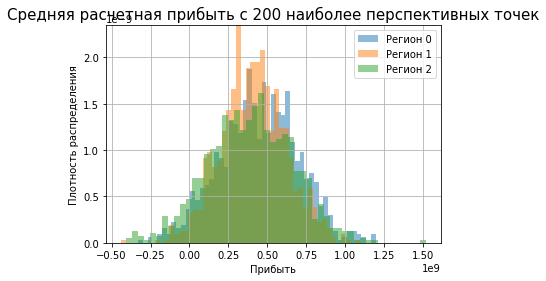

In [18]:
values_g0.hist(bins = 50, alpha=0.5, density=True)
values_g1.hist(bins = 50, alpha=0.5, density=True)
values_g2.hist(bins = 50, alpha=0.5, density=True)
plt.xlabel('Прибыть')
plt.ylabel('Плотность распределения')
plt.title('Средняя расчетная прибыть с 200 наиболее перспективных точек', fontsize=15) 
plt.legend(['Регион 0', 'Регион 1', 'Регион 2'])
plt.show()

<b>Распределение стремится к нормальному. Разницу в расчетах доверительного интервала этим не обьяснить. Для спокойствия будем использовать интервал с большим разбросом

### Вывод:

Мы рассчитали среднюю прибыль с лучших 200 точек региона, 95%-й доверительный интервал этой прибыли и риск убытков в регионе на основе 1000 исходов поиска из 500 случайных точек.

* Только в одном регионе (номер 1) достаточно низкий уровень риска (менее 2.5 процентов) для его разработки.
    
* Средняя расчетная прибыть с 200 наиболее перспективных точек с этого региона более 411 миллиона (Доверительный интервал 116 - 825 миллионов)

<a name="5."></a><br/>
<font size="6"><b>Вывод </b></font>.<br/>
[<font size="2">(к содержанию)</font>](#1common.)

### На основе данных компании «ГлавРосГосНефть» необходимо решить какой из трех представленных регионов наиболее перспективен для разработки.

**Типично при разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли:**
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков используются лишь те регионы, в которых вероятность убытков меньше 2.5%.

**Для моделирования ситуации по каждому потенциальному региону:**
* Создали предсказательную модель на основе линейной регрессии и сделали предсказание добычи нефти на 25% от выборки.

* На этих данных провели эксперимент по моделированию 1000 раз:
    * Случайным образом отобрали из них 500 скважин.
    * Нашли среди этих 200 наиболее перспективных скважин на основании предсказаний.
    * Посчитали потенциальную выручку с этих скважин.  

<font color='blue'><font size="4"><b>Наиболее перспективен для разработки регион - geo_data_1.</font> </font> 
    
**Средняя расчетная прибыть с 200 наиболее перспективных точек с этого региона более 411 миллиона.** <br>*(95% доверительный интервал 116 - 825 миллионов)*


* **На основании показателей f0, f1, f2 мы можем наиболее точно определить обьем нефтепродукта на скважине. <br>**
    * Это особенно важно, с учетом того, что на всех представленных регионах достаточный объём сырья для безубыточной разработки новой скважины меньше, чем средний обьем вырабатываемого сырья. И чтобы снизить риски необходимо точно понимать перспективность конкретной скважины.
    
    
* **Вероятность рисков значительно ниже, чем в других регионах (2.1 %).**
    * И только в этом регионе достаточно низка для разработки согласно ТЗ. (менее 2.5 %)
   

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован